# Example Customer Churn Analysis

In [117]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [118]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 80
pd.options.display.max_rows = 80

## OBTAIN
Import data file

In [119]:
## Read in and preview dataset
data = pd.read_csv('Data/cell2cell_data.csv')
data = data.drop(columns=['Sample'])
data.head()

,Revenue,Mou,Recchrge,Directas,Overage,Roam,Changem,Changer,Dropvce,Blckvce,Unansvce,Custcare,Threeway,Mourec,Outcalls,Incalls,Peakvce,Opeakvce,Dropblk,Callfwdv,Callwait,Months,Uniqsubs,Actvsubs,Csa,Phones,Models,Eqpdays,Customer,Age1,Age2,Children,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Webcap,Truck,Rv,Occprof,Occcler,Occcrft,Occstud,Occhmkr,Occret,Occself,Ownrent,Marryun,Marryyes,Marryno,Mailord,Mailres,Mailflag,Travel,Pcown,Creditcd,Retcalls,Retaccpt,Newcelly,Newcelln,Refer,Incmiss,Income,Mcycle,Creditad,Setprcm,Setprc,Retcall,Churn
0,23.9975,219.25,22.50,0.2475,0.0,0.0,-157.25,-18.9975,0.666667,0.666667,6.333333,0.000000,0.0,97.176667,0.000000,0.000000,58.000000,24.000000,1.333333,0.0,0.333333,61,2,1,SEAPOR503,2,2,361,1000001,62.0,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,4,0,0,0,29.989990,1,1
1,16.9900,10.25,16.99,0.0000,0.0,0.0,-4.25,0.0000,0.333333,0.000000,2.666667,0.000000,0.0,0.000000,0.000000,0.000000,5.000000,1.000000,0.333333,0.0,0.000000,58,1,1,PITHOM412,2,1,1504,1000003,40.0,42.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,5,0,0,0,29.989990,0,1
2,38.0000,7.50,38.00,0.0000,0.0,0.0,-1.50,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.413333,0.333333,0.000000,1.333333,3.666667,0.000000,0.0,0.000000,60,1,1,MILMIL414,1,1,1812,1000004,26.0,26.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,6,0,0,1,0.000000,0,0
3,55.2300,570.50,71.98,0.0000,0.0,0.0,38.50,0.0000,9.666667,0.666667,77.000000,8.666667,0.0,106.330000,14.666667,0.666667,97.333333,90.333333,10.333333,0.0,0.000000,57,1,1,NNYSYR315,6,4,434,1000005,56.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,6,0,2,0,79.989990,0,0
4,17.1450,0.00,16.99,0.0000,0.0,0.0,0.00,-0.1550,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,53,2,2,OKCTUL918,4,3,852,1000007,46.0,54.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,9,0,1,0,9.989998,0,1


In [120]:
## Examine descriptive statistics
data.describe()

,Revenue,Mou,Recchrge,Directas,Overage,Roam,Changem,Changer,Dropvce,Blckvce,Unansvce,Custcare,Threeway,Mourec,Outcalls,Incalls,Peakvce,Opeakvce,Dropblk,Callfwdv,Callwait,Months,Uniqsubs,Actvsubs,Phones,Models,Eqpdays,Customer,Age1,Age2,Children,Credita,Creditaa,Creditb,Creditc,Creditde,Creditgy,Creditz,Prizmrur,Prizmub,Prizmtwn,Refurb,Webcap,Truck,Rv,Occprof,Occcler,Occcrft,Occstud,Occhmkr,Occret,Occself,Ownrent,Marryun,Marryyes,Marryno,Mailord,Mailres,Mailflag,Travel,Pcown,Creditcd,Retcalls,Retaccpt,Newcelly,Newcelln,Refer,Incmiss,Income,Mcycle,Creditad,Setprcm,Setprc,Retcall,Churn
count,39858.000000,39859.00000,39859.000000,39859.000000,39859.000000,39859.000000,39639.000000,39627.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,4.000000e+04,39294.000000,39294.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,58.634114,513.97351,46.271960,0.878711,40.863133,1.228694,-15.006928,-0.939621,5.940213,4.030525,27.771762,1.778229,0.284450,112.157275,24.836208,7.993717,88.685446,66.074487,10.046646,0.009167,1.790696,18.831750,1.551675,1.35925,1.788325,1.543400,392.839500,1.049981e+06,31.062427,21.016746,0.244325,0.171550,0.377100,0.167875,0.101700,0.11815,0.022200,0.041425,0.049800,0.318825,0.149300,0.144725,0.894900,0.187400,0.081625,0.173550,0.020025,0.029150,0.007300,0.003025,0.014225,0.017850,0.335125,0.388350,0.365325,0.246325,0.357225,0.372425,0.015075,0.057075,0.185325,0.675825,0.044025,0.020425,0.193100,0.140600,0.047850,0.252650,4.330900,0.013950,0.051525,0.575925,34.976005,0.040425,0.500000
std,44.142009,524.75989,23.714145,2.072555,98.272111,8.329852,259.646507,39.766798,8.880774,10.495103,38.250252,5.175107,1.074865,165.082658,34.764911,16.611850,102.933661,91.916943,15.348324,0.472957,5.375079,9.624604,1.314600,0.68480,1.319891,0.893553,256.715982,2.879733e+04,22.057552,23.810636,0.429692,0.376994,0.484666,0.373760,0.302257,0.32279,0.147335,0.199274,0.217534,0.466027,0.356388,0.351828,0.306686,0.390237,0.273796,0.378727,0.140087,0.168229,0.085129,0.054917,0.118419,0.132408,0.472040,0.487381,0.481527,0.430875,0.479188,0.483457,0.121853,0.231989,0.388566,0.468072,0.224584,0.150693,0.394736,0.347613,0.249223,0.434537,3.144329,0.117285,0.343909,0.494208,56.620460,0.196956,0.500006
min,-5.862500,0.00000,-11.290000,0.000000,0.000000,0.000000,-2867.500000,-851.105000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.00000,1.000000,1.000000,-5.000000,1.000001e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.370000,151.25000,30.000000,0.000000,0.000000,0.000000,-87.500000,-7.141250,0.666667,0.000000,5.000000,0.000000,0.000000,7.606667,3.000000,0.000000,21.666667,10.333333,1.666667,0.000000,0.000000,11.000000,1.000000,1.00000,1.000000,1.000000,212.000000,1.025206e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [121]:
## Examine metadata for DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 76 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Revenue   39858 non-null  float64
 1   Mou       39859 non-null  float64
 2   Recchrge  39859 non-null  float64
 3   Directas  39859 non-null  float64
 4   Overage   39859 non-null  float64
 5   Roam      39859 non-null  float64
 6   Changem   39639 non-null  float64
 7   Changer   39627 non-null  float64
 8   Dropvce   40000 non-null  float64
 9   Blckvce   40000 non-null  float64
 10  Unansvce  40000 non-null  float64
 11  Custcare  40000 non-null  float64
 12  Threeway  40000 non-null  float64
 13  Mourec    40000 non-null  float64
 14  Outcalls  40000 non-null  float64
 15  Incalls   40000 non-null  float64
 16  Peakvce   40000 non-null  float64
 17  Opeakvce  40000 non-null  float64
 18  Dropblk   40000 non-null  float64
 19  Callfwdv  40000 non-null  float64
 20  Callwait  40000 non-null  fl

In [122]:
## Read in and preview documentation of variables
doc = pd.read_csv('Data/cell2cell_doc.csv')
doc.head()

,position,type,subtype,variable,description,var_type
0,1,Behavior,Spending,Revenue,Mean monthly revenue,num
1,2,Behavior,Usage,Mou,Mean monthly minutes of use,num
2,3,Behavior,Spending,Recchrge,Mean total recurring charge,num
3,4,Behavior,Usage,Directas,Mean number of director assisted calls,num
4,5,Behavior,Usage,Overage,Mean overage minutes of use,num


### Functions for Exploration and Analysis

In [46]:
def check_unique(col, df, dropna=False):
    
    """Takes in a Pandas DataFrame and specific column name and returns a Pandas DataFrame 
    displaying the unique values in that column as well as the count of each unique value. 
    Default is to also provide a count of NaN values.
    
    Args:
        col (str): Name of the column you want to check.
        df (Pandas DataFrame): DataFrame containing the column to check the unique values of.
        dropna (bool, default=False): Whether or not to drop null values from list of values.
    
    Returns:
        DataFrame: Pandas DataFrame with columns for the unique values in the specified column, 
            the number of occurrences of each unique value in that column, and the percentage of 
            the column made up by each unique value.
    
    Example:
        >>> df = pd.DataFrame({'a': [2, 4, 4, 6],
                               'b': [2, 1, 3, 4]})

        >>> check_unique(col='a', df, dropna=False)
        
            count   %
        4   2   0.50
        6   1   0.25
        2   1   0.25
    """
    
    import pandas as pd
    
    unique_vals = pd.DataFrame()
    unique_vals['count'] = pd.Series(df[col].value_counts(dropna=dropna))
    unique_vals['%'] = pd.Series(round(df[col].value_counts(normalize=True, dropna=dropna)*100, 2))
    
    display(unique_vals.style.set_caption(col))


In [47]:
def plot_bar(feature, data, target='Churn', hue='Churn', show_legend=False):
    
    """Takes in a feature/ column name, the DataFrame containing the column, and the target variable
       and returns a barplot for that feature grouped by churn status.
    """
    
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    plt.figure(figsize=(7,5))
    fig = sns.barplot(x=target,
                      y=feature,
                      palette='nipy_spectral',
                      hue=hue,
                      data=data)
    fig.set_title('Churn vs {}'.format(feature), fontsize=16, weight='bold')
    fig.set_xlabel('Churn', fontsize=14, weight='bold')
    fig.set_ylabel(feature, fontsize=14, weight='bold')
    
    if show_legend==False:
        fig.get_legend().remove()
    
    return fig

In [105]:
def eval_clf(clf, X_test, y_test, model_descr='',
                    target_labels=['Retain', 'Churn'],
                    cmap='Blues', normalize='true', save=False, fig_name=None):
    
    """Given an sklearn binary classification model (already fit to training data), test features, and test labels,
       displays sklearn.metrics classification report, confusion matrix, and ROC curve. A description of the model 
       can be provided to model_descr to customize the title of the classification report.
       
       
    Args:
        clf (estimator): Fitted classifier with a binary target.
        X_test (series or array): Subset of X data used for testing.
        y_test (series or array): Subset of y data used for testing.
        model_descr (str): A description of the model for customizing plot title.
        target_labels (list of strings, default=['Retain', 'Churn']): List of class labels 
            used for formatting tick labels.
        cmap (str, default='Blues'): Specifies a color map that can be used by sklearn's plot_confusion_matrix.
        normalize (str, {'true', 'pred', 'all', None}, default='true'): Whether to normalize the
        confusion matrix over the true (rows), predicted (columns) conditions or all the population. 
        If None, confusion matrix will not be normalized.
        save (bool, default=False): Whether to save the returned figure.
        fig_name (str, optional): What to name the file if the image is being saved.
    
    Returns:
        display: Sklearn classification report and confusion matrix.
    
    Example:
        >>> eval_classifier(clf=my_model, X_test, y_test, model_descr='My Model',
                    target_labels=['No Vote', 'Vote'],
                    cmap='Blues', normalize='true', save=true, fig_name='my_model_eval')
    
    """
    
    fig_filepath = 'Figures/'
    
    ## get model predictions
    y_hat_test = clf.predict(X_test)
    
    
    ## Classification Report
    report_title = 'Classification Report: {}'.format(model_descr)
    divider = ('-----' * 11) + ('-' * (len(model_descr) - 31))
    report_table = classification_report(y_test, y_hat_test,
                                         target_names=target_labels)
    print(divider, report_title, divider, report_table, divider, divider, '\n', sep='\n')
    
    
    ## Make Subplots for Figures
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    
    ## Confusion Matrix
    plot_confusion_matrix(clf, X_test, y_test, 
                                  display_labels=target_labels, 
                                  normalize=normalize, cmap=cmap, ax=axes[0])
    
    axes[0].set_title('Confusion Matrix', fontdict={'fontsize': 18,'fontweight': 'bold'})
    axes[0].set_xlabel(axes[0].get_xlabel(),
                       fontdict={'fontsize': 12,'fontweight': 'bold'})
    axes[0].set_ylabel(axes[0].get_ylabel(),
                       fontdict={'fontsize': 12,'fontweight': 'bold'})
    axes[0].set_xticklabels(axes[0].get_xticklabels(),
                       fontdict={'fontsize': 10,'fontweight': 'bold'})
    axes[0].set_yticklabels(axes[0].get_yticklabels(), 
                       fontdict={'fontsize': 10,'fontweight': 'bold'})
    
    
    ## ROC Curve
    plot_roc_curve(clf, X_test, y_test, ax=axes[1])
    # plot line that demonstrates probable success when randomly guessing labels
    axes[1].plot([0,1],[0,1], ls='--', color='r')
    
    axes[1].set_title('ROC Curve', 
                      fontdict={'fontsize': 18,'fontweight': 'bold'})
    axes[1].set_xlabel(axes[1].get_xlabel(), 
                      fontdict={'fontsize': 12,'fontweight': 'bold'})
    axes[1].set_ylabel(axes[1].get_ylabel(), 
                      fontdict={'fontsize': 12,'fontweight': 'bold'})
    
    
    if save:
        plt.savefig(fig_filepath+fig_name, bbox_inches = "tight")
    
    fig.tight_layout()
    plt.show()

    return fig, axes


## Explore

In [81]:
## No duplicate customer ids
print(len(data))
data['Customer'].nunique() # length of dataset equal to number of unique ids

40000


40000

In [82]:
## Check for class imbalance
check_unique('Churn', data) # 50/50 split

,count,%
0,20000,50.000000
1,20000,50.000000


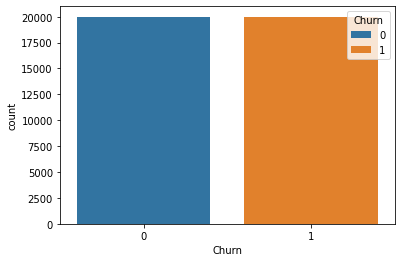

In [83]:
sns.countplot(x='Churn', data=data, hue='Churn', dodge=False);

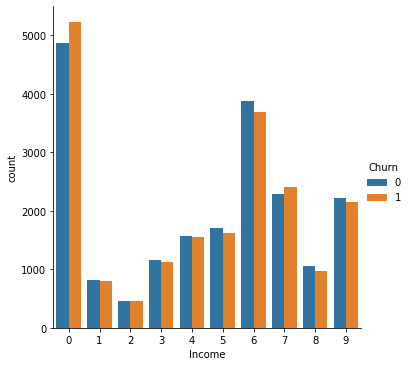

In [85]:
sns.catplot(x='Income', hue='Churn', data=data, kind='count');

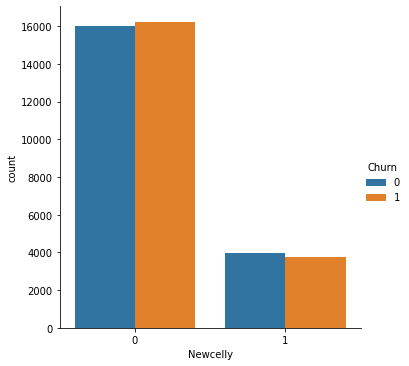

In [53]:
sns.catplot(x='Newcelly', hue='Churn', data=data, kind='count');

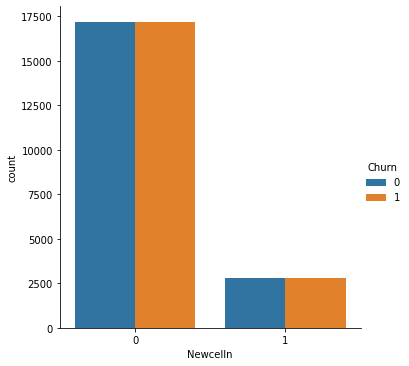

In [54]:
sns.catplot(x='Newcelln', hue='Churn', data=data, kind='count');

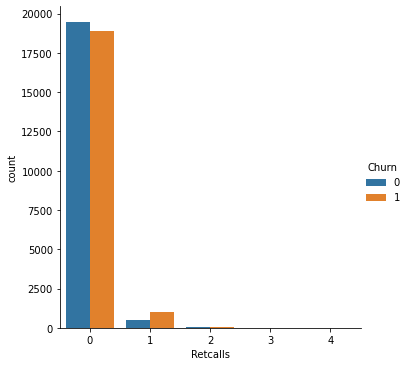

In [55]:
sns.catplot(x='Retcalls', hue='Churn', data=data, kind='count');

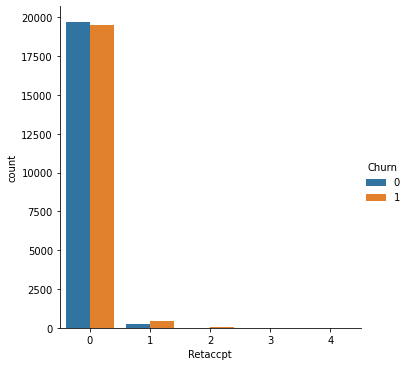

In [56]:
sns.catplot(x='Retaccpt', hue='Churn', data=data, kind='count');

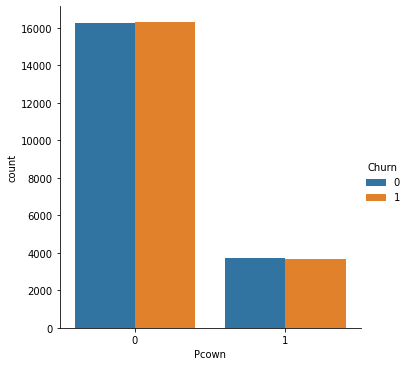

In [57]:
sns.catplot(x='Pcown', hue='Churn', data=data, kind='count');

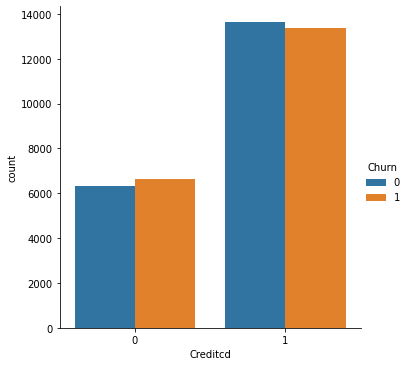

In [58]:
sns.catplot(x='Creditcd', hue='Churn', data=data, kind='count');

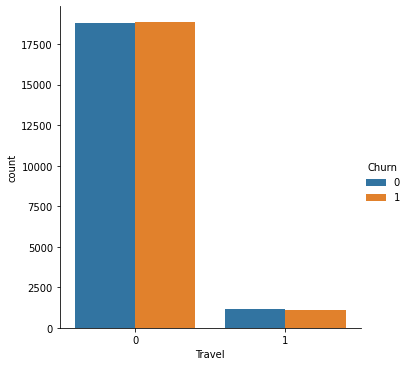

In [59]:
sns.catplot(x='Travel', hue='Churn', data=data, kind='count');

In [113]:
check_unique('Marryyes', data)

,count,%
0,25387,63.470000
1,14613,36.530000


In [114]:
check_unique('Prizmrur', data)

,count,%
0,38008,95.020000
1,1992,4.980000


In [115]:
check_unique('Prizmub', data)

,count,%
0,27247,68.120000
1,12753,31.880000


In [116]:
check_unique('Prizmtwn', data)

,count,%
0,34028,85.070000
1,5972,14.930000


/Users/maxsteele/opt/anaconda3/envs/churn-env/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


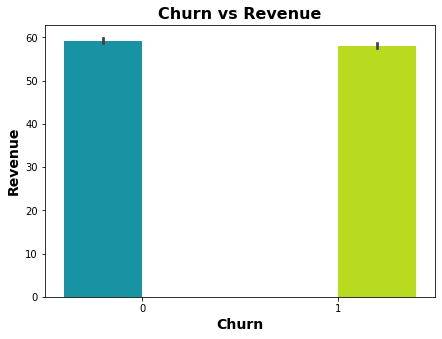

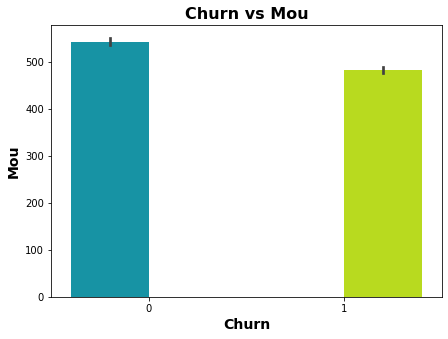

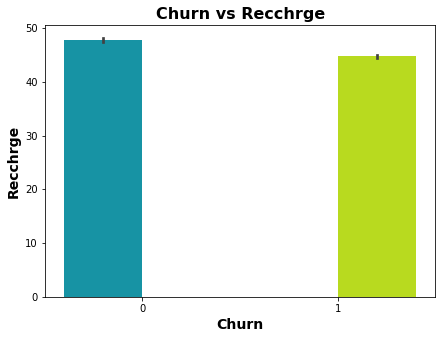

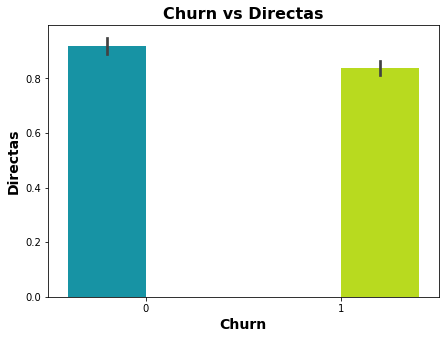

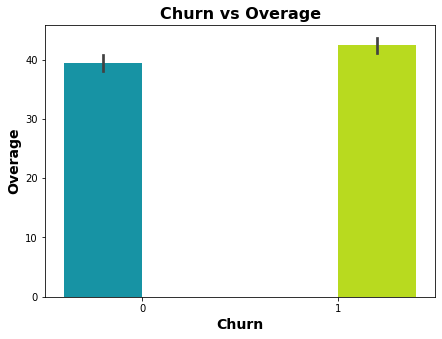

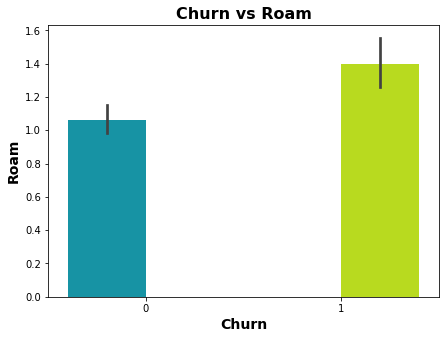

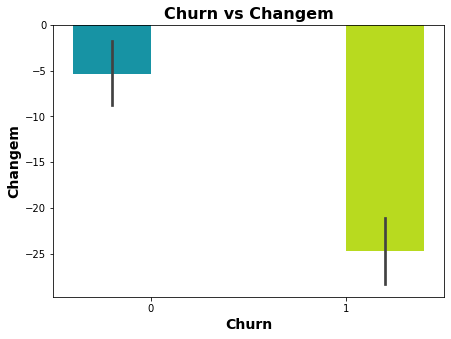

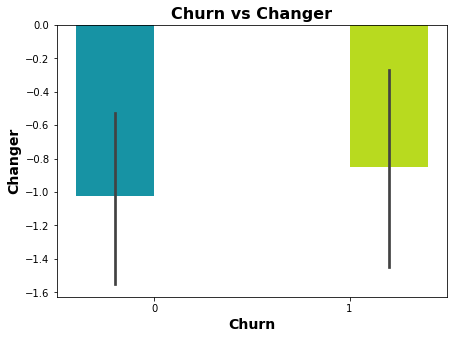

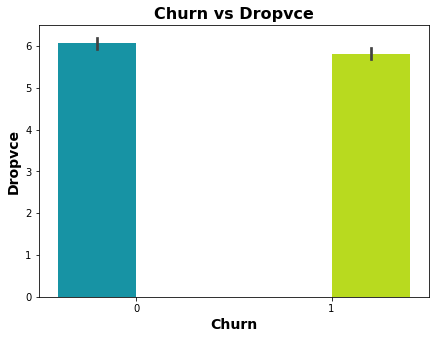

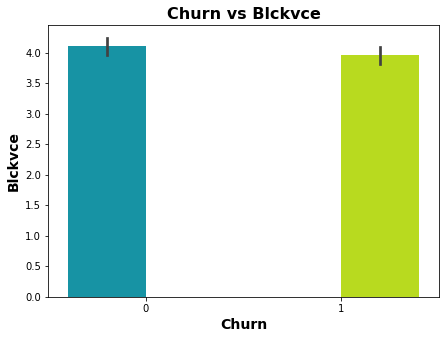

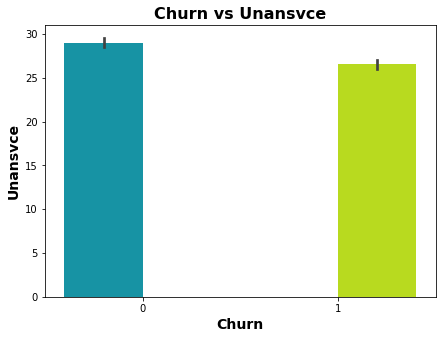

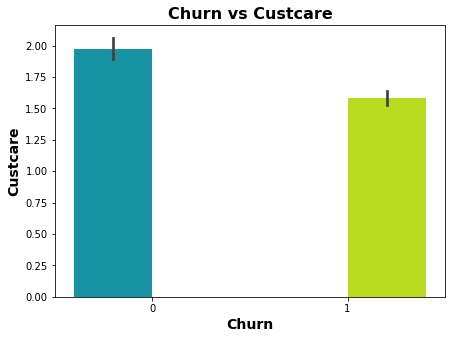

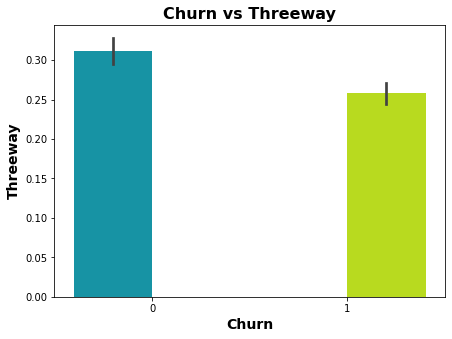

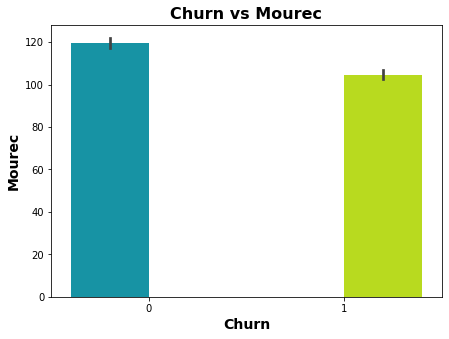

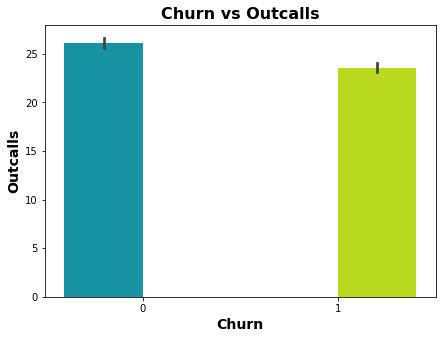

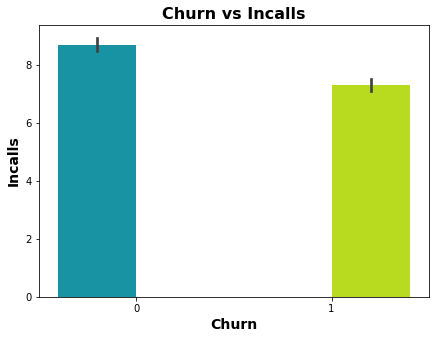

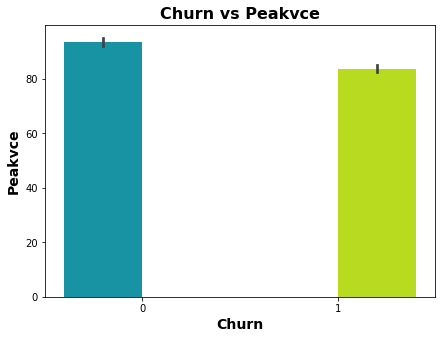

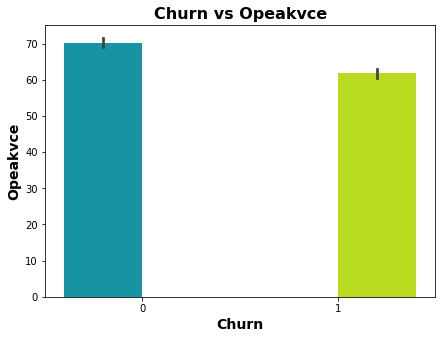

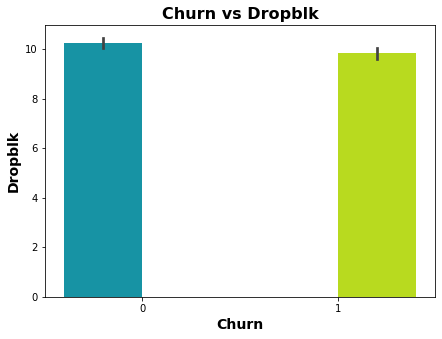

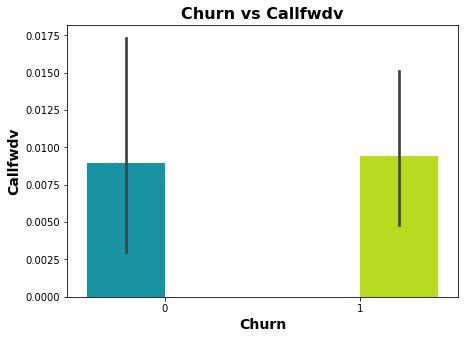

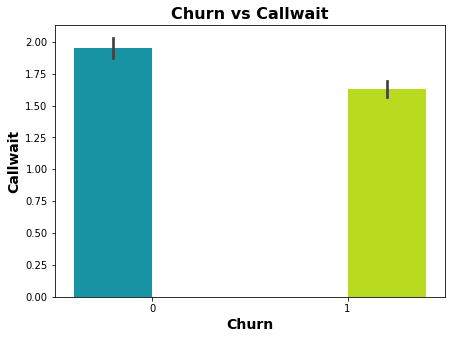

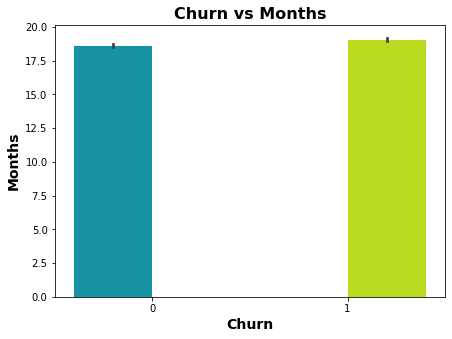

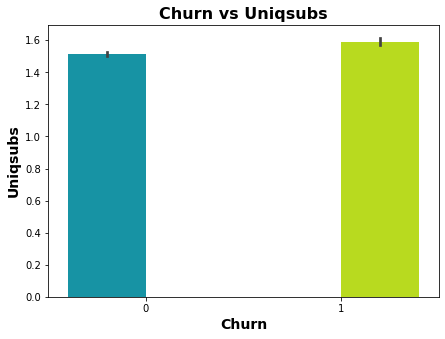

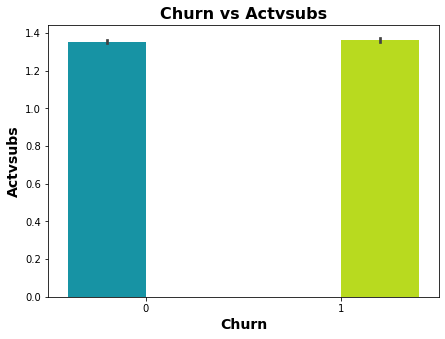

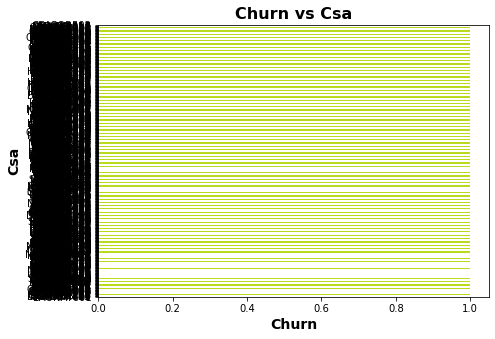

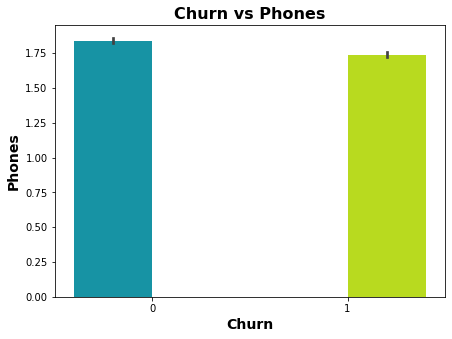

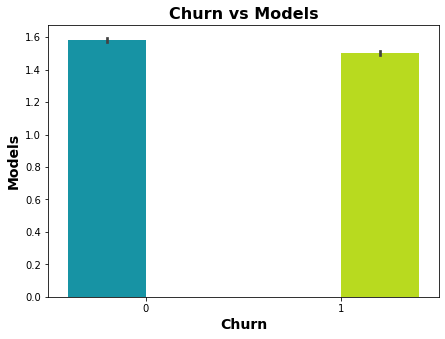

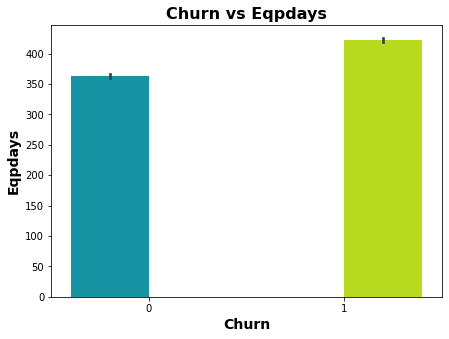

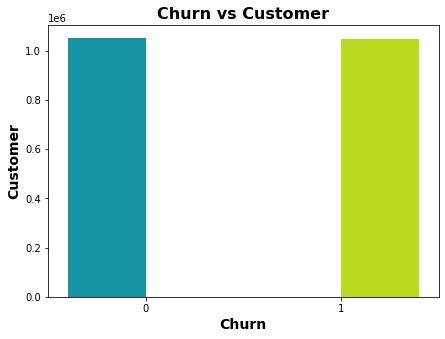

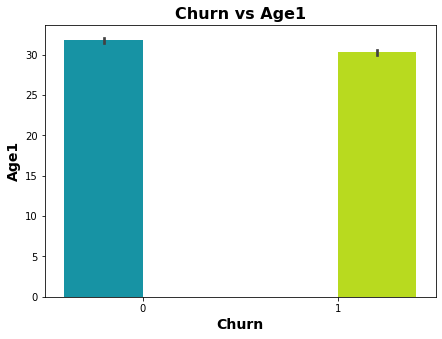

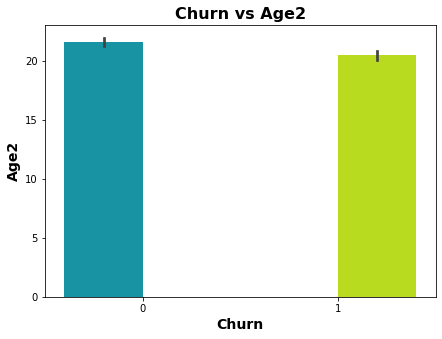

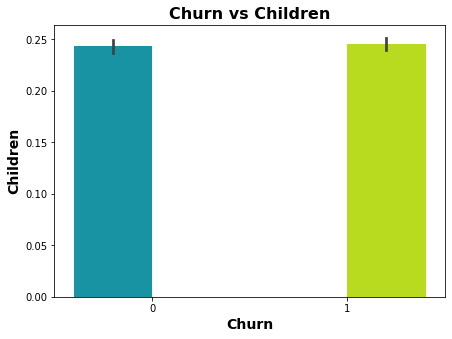

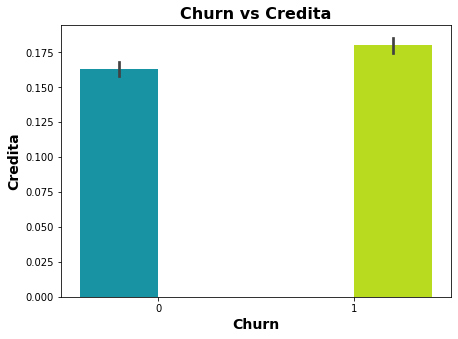

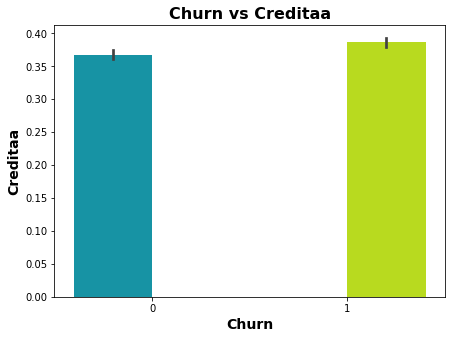

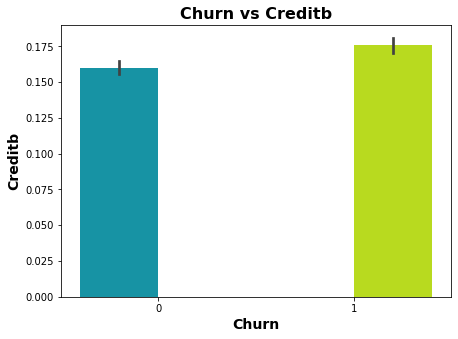

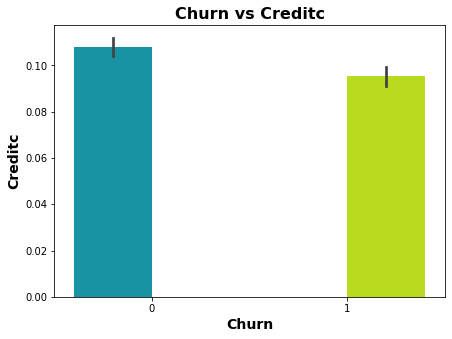

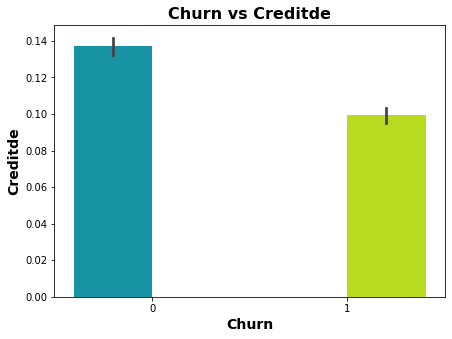

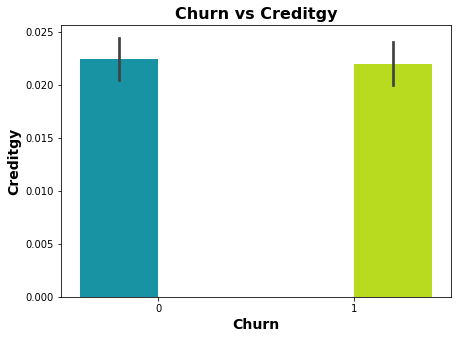

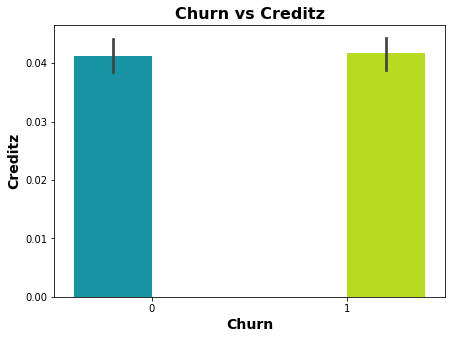

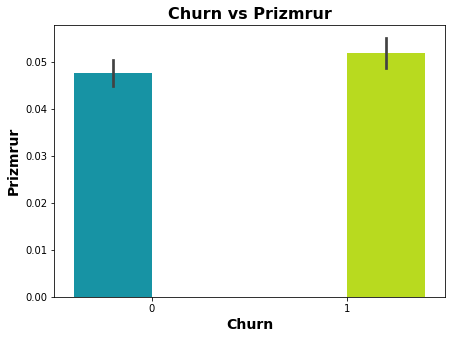

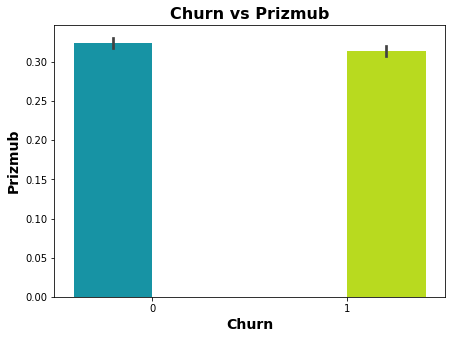

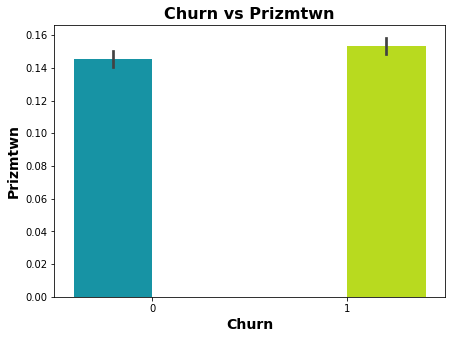

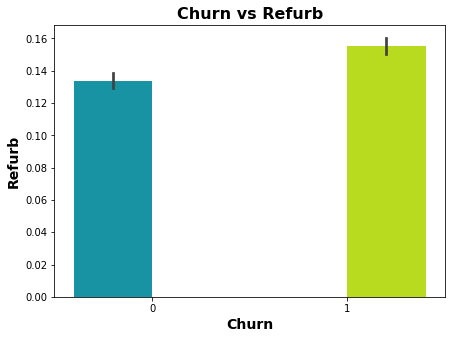

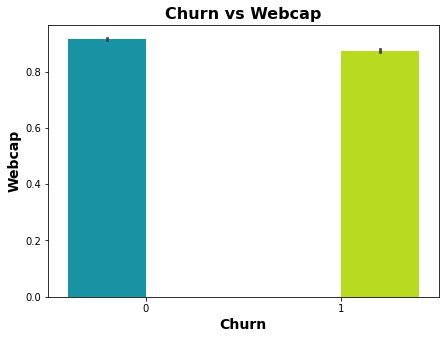

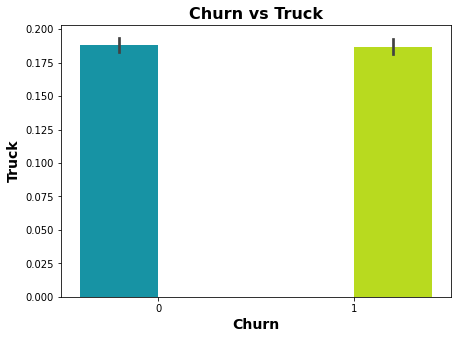

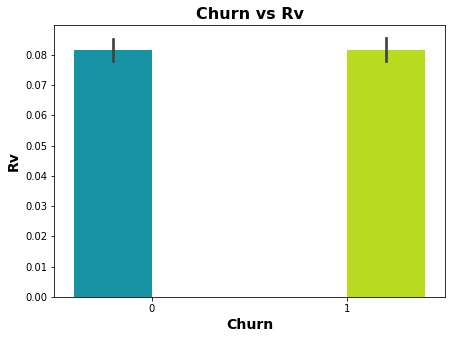

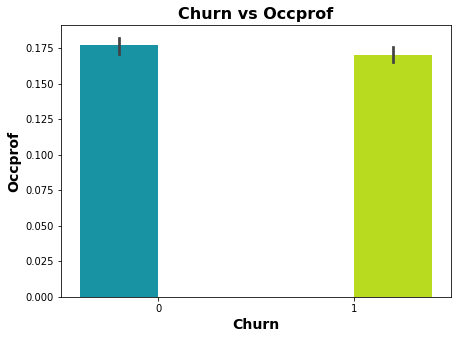

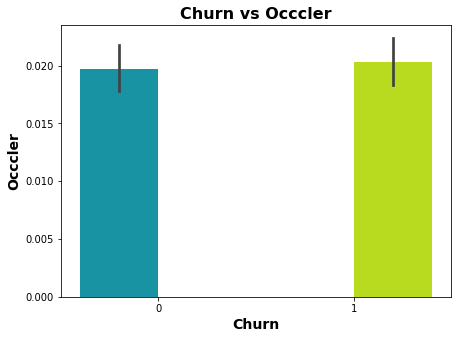

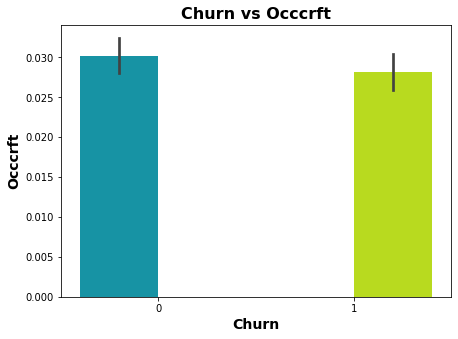

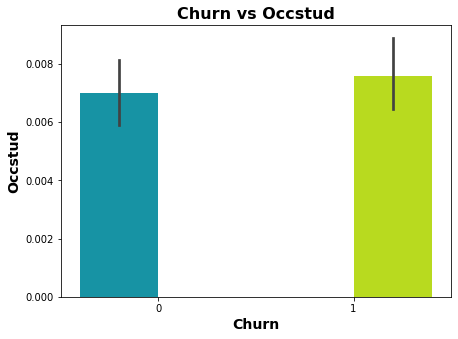

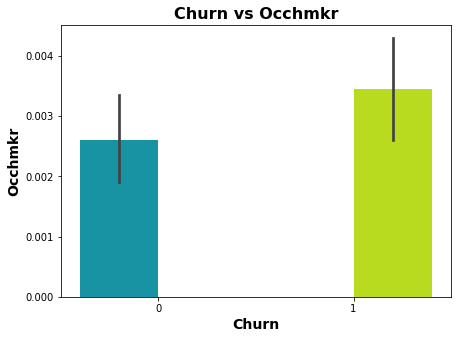

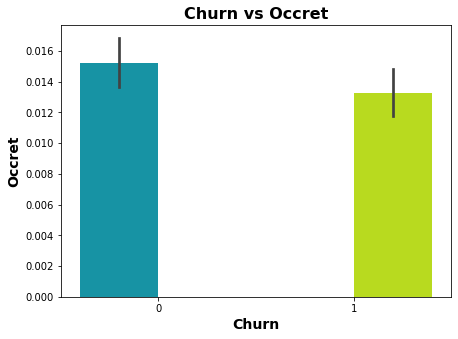

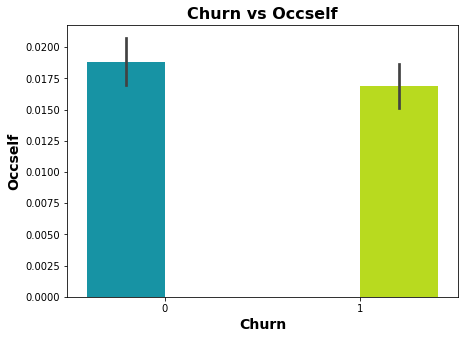

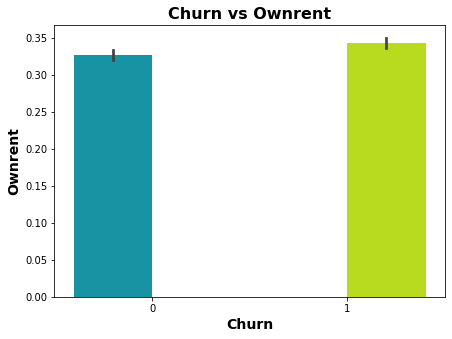

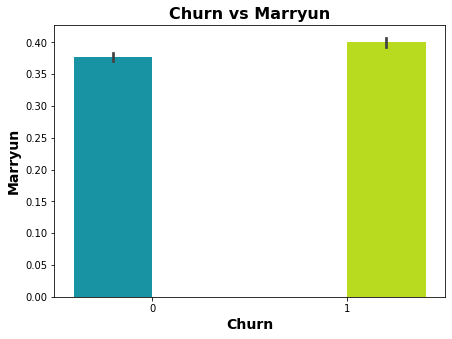

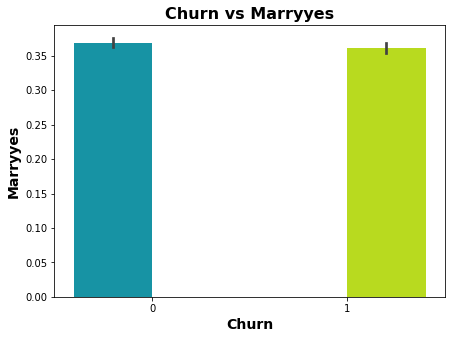

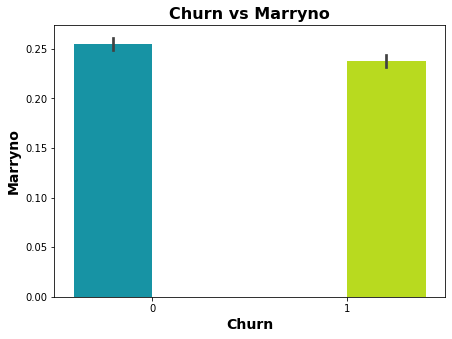

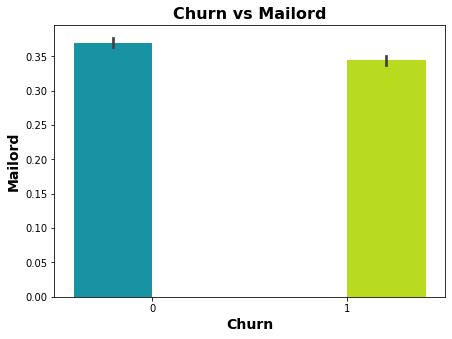

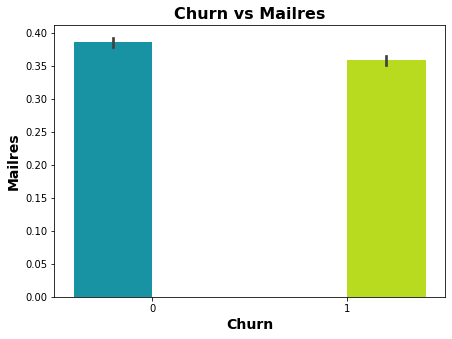

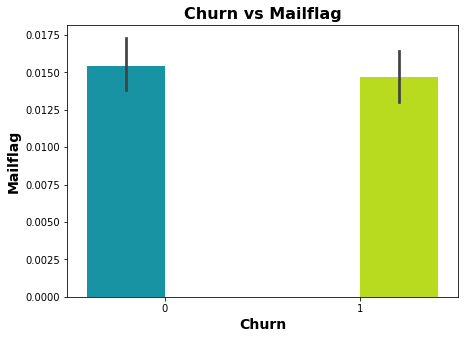

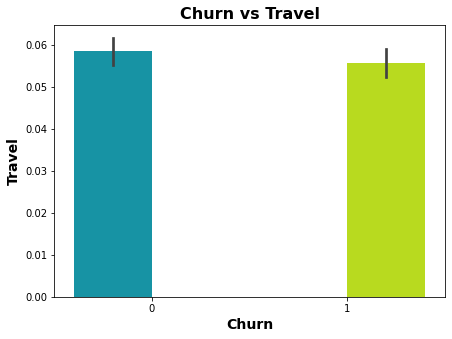

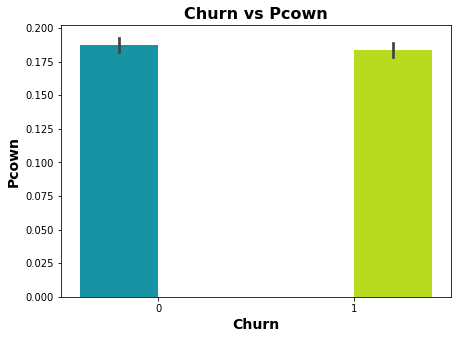

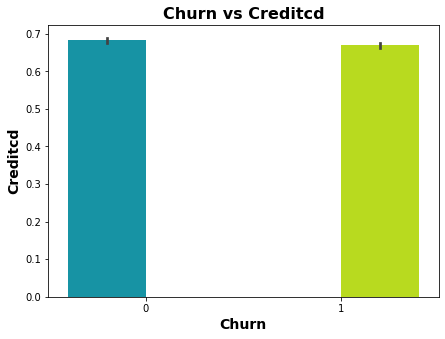

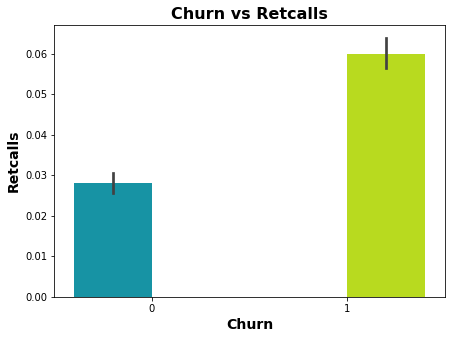

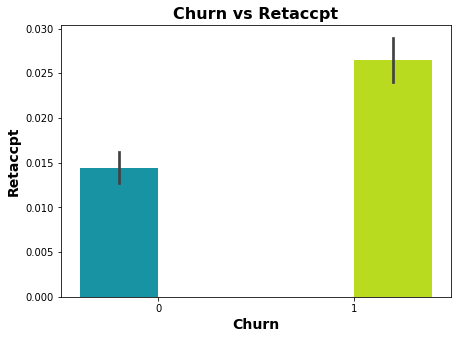

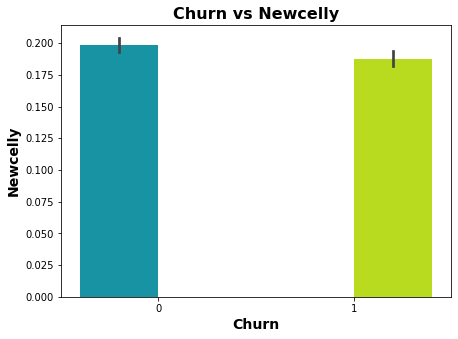

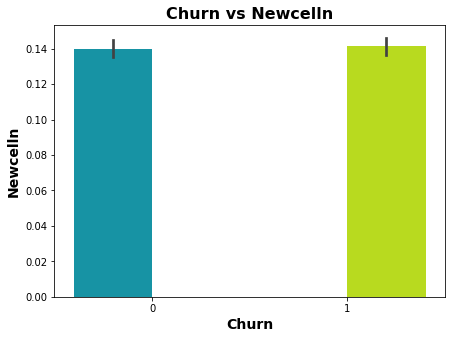

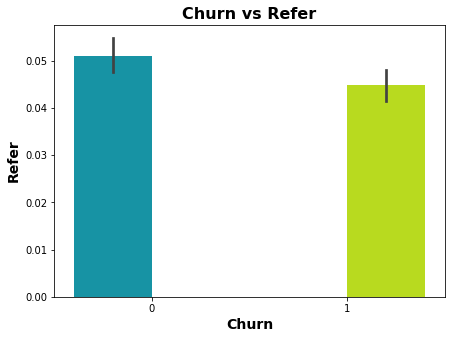

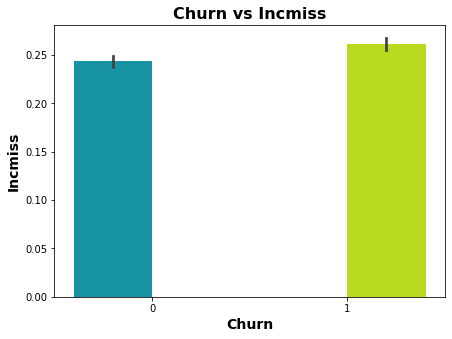

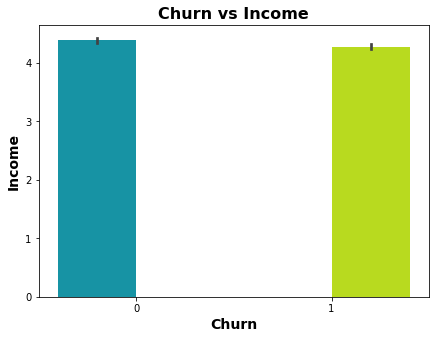

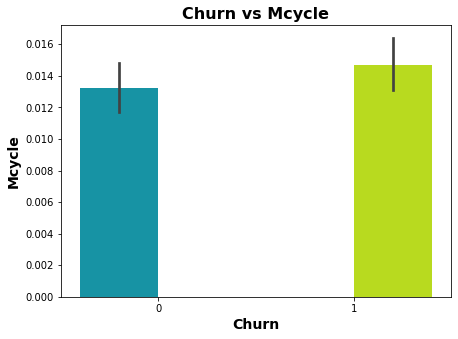

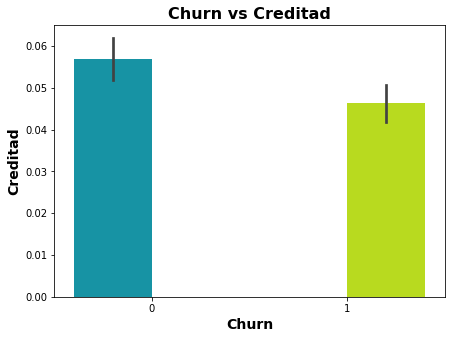

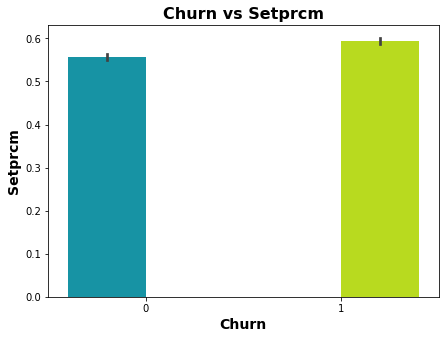

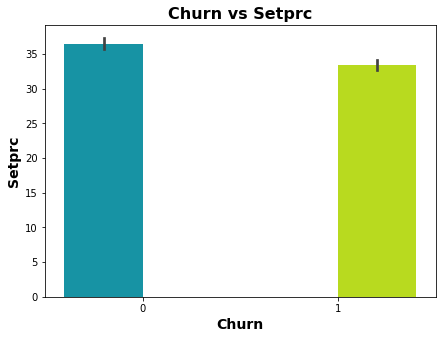

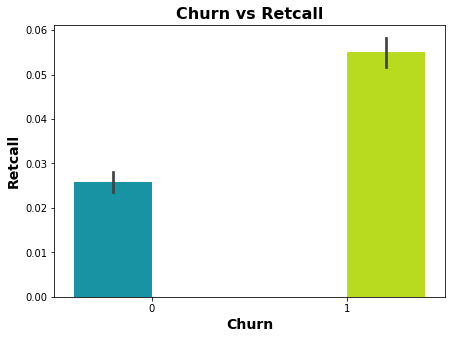

In [60]:
for col in data.columns[:-1]:
    plot_bar(col, data);

In [61]:
## Income of 0 means the information is missing for that customer
check_unique('Income', data)

,count,%
0,10106,25.260000
6,7564,18.910000
7,4699,11.750000
9,4370,10.920000
5,3318,8.300000
4,3120,7.800000
3,2270,5.680000
8,2042,5.100000
1,1609,4.020000
2,902,2.260000


In [62]:
## Very little variation -- zero-inflated variable
check_unique('Refer', data)

,count,%
0,38250,95.620000
1,1654,4.140000
2,66,0.160000
3,16,0.040000
4,5,0.010000
5,3,0.010000
6,3,0.010000
7,1,0.000000
9,1,0.000000
11,1,0.000000


In [63]:
## Not very many customers are making calls to the retention team
check_unique('Retcalls', data)

,count,%
0,38383,95.960000
1,1493,3.730000
2,107,0.270000
3,14,0.030000
4,3,0.010000


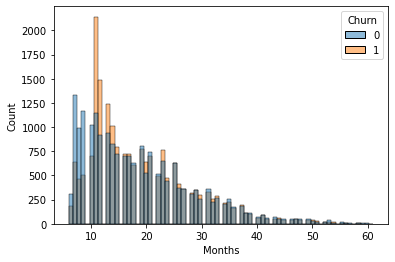

In [64]:
sns.histplot(x='Months', hue='Churn', data=data);

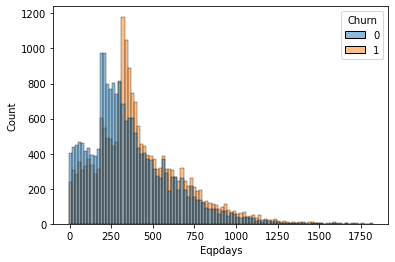

In [65]:
sns.histplot(x='Eqpdays', hue='Churn', data=data);

<AxesSubplot:>

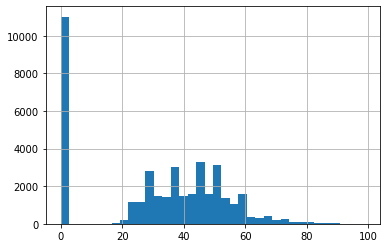

In [112]:
## Missing values for a customer's age are encoded as 0s.
  # More than 11,000 customers are missing this information,
    # so it doesn't make sense to impute this information
data['Age1'].hist(bins='auto');

## Scrub
Prepare data for analysis - deal with missing values, create new features

In [123]:
## Get the credit score column names into a single list
credit_cols = [col for col in data.columns if 'Credit' in col]
# Drop non-credit-score columns from list
credit_cols.remove('Creditcd')
credit_cols.remove('Creditad')
credit_cols

['Credita',
 'Creditaa',
 'Creditb',
 'Creditc',
 'Creditde',
 'Creditgy',
 'Creditz']

In [124]:
## Convert credit score variables so they can be ranked as a single variable
data['Creditz'] = np.where(data['Creditz']==1, 1, 0)
data['Creditgy'] = np.where(data['Creditgy']==1, 2, 0)
data['Creditde'] = np.where(data['Creditde']==1, 3, 0)
data['Creditc'] = np.where(data['Creditc']==1, 4, 0)
data['Creditb'] = np.where(data['Creditb']==1, 5, 0)
data['Creditaa'] = np.where(data['Creditaa']==1, 6, 0)
data['Credita'] = np.where(data['Credita']==1, 7, 0)

## Sum across 'Credit..' columns to get single 'Credit' variable
data['Credit'] = data[credit_cols].sum(axis=1)
data['Credit'].value_counts()

6    15084
7     6862
5     6715
3     4726
4     4068
1     1657
2      888
Name: Credit, dtype: int64

In [125]:
## Convert 'Refer' into a binary variable
data['Refery'] = np.where(data['Refer']==0, 0, 1)

In [126]:
## Create new DataFrame with just 22 predictors of interest
  ## and the target variable 'Churn'
model_data = data[['Mou', 'Recchrge', 'Roam', 'Changem', 'Custcare',
                   'Threeway', 'Outcalls', 'Incalls', 'Months', 'Eqpdays',
                   'Credit', 'Prizmrur', 'Prizmub', 'Prizmtwn', 'Refurb', 
                   'Occprof', 'Occstud', 'Occhmkr', 'Occret', 'Occself', 
                   'Refery', 'Income', 'Churn']]

In [127]:
model_data.describe()

,Mou,Recchrge,Roam,Changem,Custcare,Threeway,Outcalls,Incalls,Months,Eqpdays,Credit,Prizmrur,Prizmub,Prizmtwn,Refurb,Occprof,Occstud,Occhmkr,Occret,Occself,Refery,Income,Churn
count,39859.00000,39859.000000,39859.000000,39639.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.0000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,513.97351,46.271960,1.228694,-15.006928,1.778229,0.284450,24.836208,7.993717,18.831750,392.839500,5.1499,0.049800,0.318825,0.149300,0.144725,0.173550,0.007300,0.003025,0.014225,0.017850,0.043750,4.330900,0.500000
std,524.75989,23.714145,8.329852,259.646507,5.175107,1.074865,34.764911,16.611850,9.624604,256.715982,1.5741,0.217534,0.466027,0.356388,0.351828,0.378727,0.085129,0.054917,0.118419,0.132408,0.204541,3.144329,0.500006
min,0.00000,-11.290000,0.000000,-2867.500000,0.000000,0.000000,0.000000,0.000000,6.000000,-5.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.25000,30.000000,0.000000,-87.500000,0.000000,0.000000,3.000000,0.000000,11.000000,212.000000,4.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,356.50000,44.990000,0.000000,-6.250000,0.000000,0.000000,13.000000,2.000000,17.000000,342.000000,6.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.500000
75%,702.50000,59.990000,0.235000,63.000000,1.333333,0.333333,33.000000,8.666667,24.000000,532.000000,6.0000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
max,7667.75000,349.572500,850.862500,5192.250000,365.666667,55.666667,610.333333,519.333333,61.000000,1823.000000,7.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000


In [128]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mou       39859 non-null  float64
 1   Recchrge  39859 non-null  float64
 2   Roam      39859 non-null  float64
 3   Changem   39639 non-null  float64
 4   Custcare  40000 non-null  float64
 5   Threeway  40000 non-null  float64
 6   Outcalls  40000 non-null  float64
 7   Incalls   40000 non-null  float64
 8   Months    40000 non-null  int64  
 9   Eqpdays   40000 non-null  int64  
 10  Credit    40000 non-null  int64  
 11  Prizmrur  40000 non-null  int64  
 12  Prizmub   40000 non-null  int64  
 13  Prizmtwn  40000 non-null  int64  
 14  Refurb    40000 non-null  int64  
 15  Occprof   40000 non-null  int64  
 16  Occstud   40000 non-null  int64  
 17  Occhmkr   40000 non-null  int64  
 18  Occret    40000 non-null  int64  
 19  Occself   40000 non-null  int64  
 20  Refery    40000 non-null  in

> Only 6 of our 20 selected predictors are missing information (have null values). All 6 variables have information missing in less than 1,000 cases, so we'll just drop records that are missing information for the purpose of this analysis.

In [129]:
## Drop records that are missing information from the dataset
model_data = model_data.dropna()
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39639 entries, 0 to 39995
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mou       39639 non-null  float64
 1   Recchrge  39639 non-null  float64
 2   Roam      39639 non-null  float64
 3   Changem   39639 non-null  float64
 4   Custcare  39639 non-null  float64
 5   Threeway  39639 non-null  float64
 6   Outcalls  39639 non-null  float64
 7   Incalls   39639 non-null  float64
 8   Months    39639 non-null  int64  
 9   Eqpdays   39639 non-null  int64  
 10  Credit    39639 non-null  int64  
 11  Prizmrur  39639 non-null  int64  
 12  Prizmub   39639 non-null  int64  
 13  Prizmtwn  39639 non-null  int64  
 14  Refurb    39639 non-null  int64  
 15  Occprof   39639 non-null  int64  
 16  Occstud   39639 non-null  int64  
 17  Occhmkr   39639 non-null  int64  
 18  Occret    39639 non-null  int64  
 19  Occself   39639 non-null  int64  
 20  Refery    39639 non-null  in

In [130]:
## Recheck for class imbalance now that approx 1,100 records have been dropped
check_unique('Churn', model_data) # still nearly equal distribution

,count,%
0,19919,50.250000
1,19720,49.750000


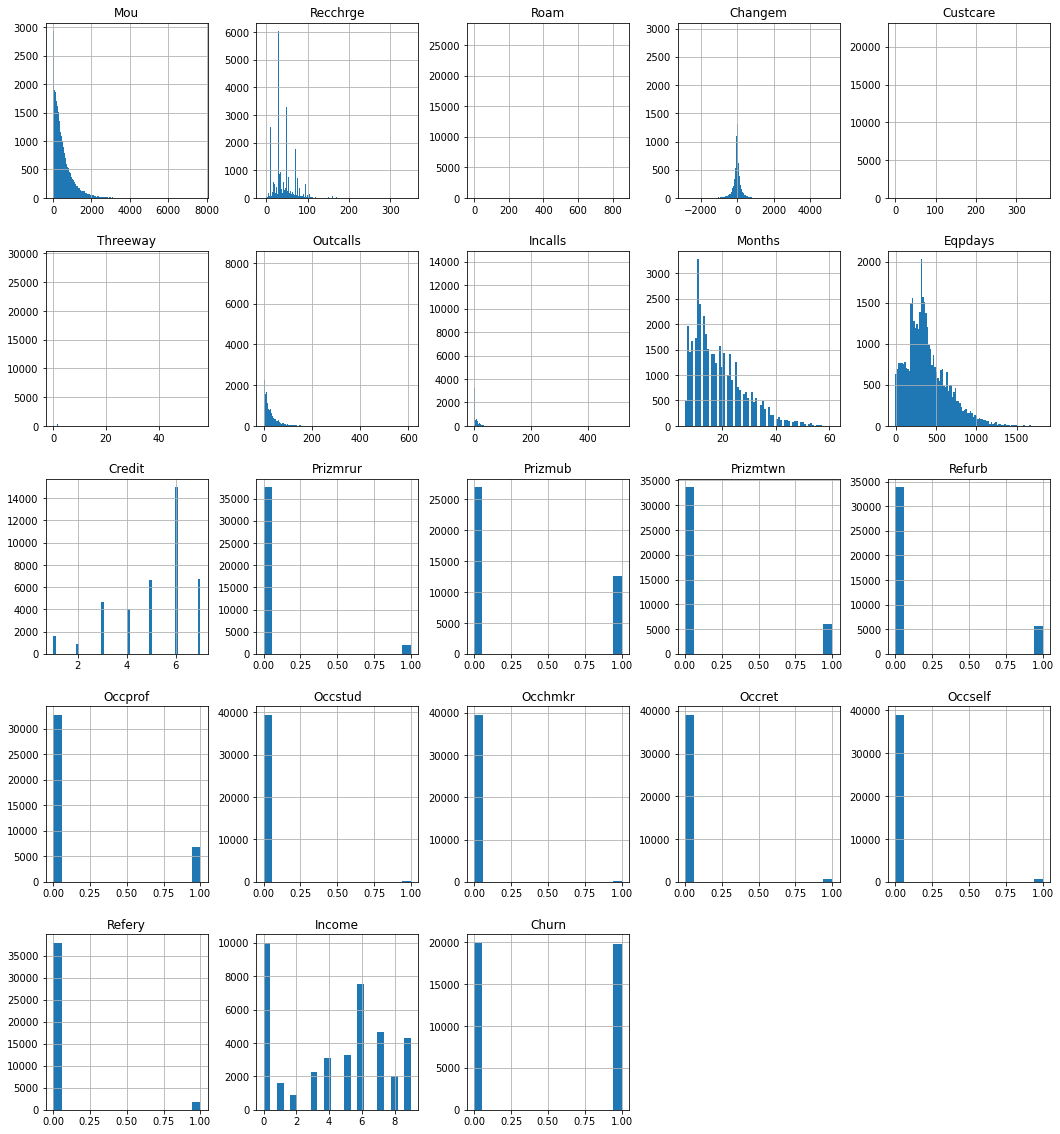

In [131]:
## Check distributions of all the variables and target
model_data.hist(figsize=(18, 20), bins='auto');

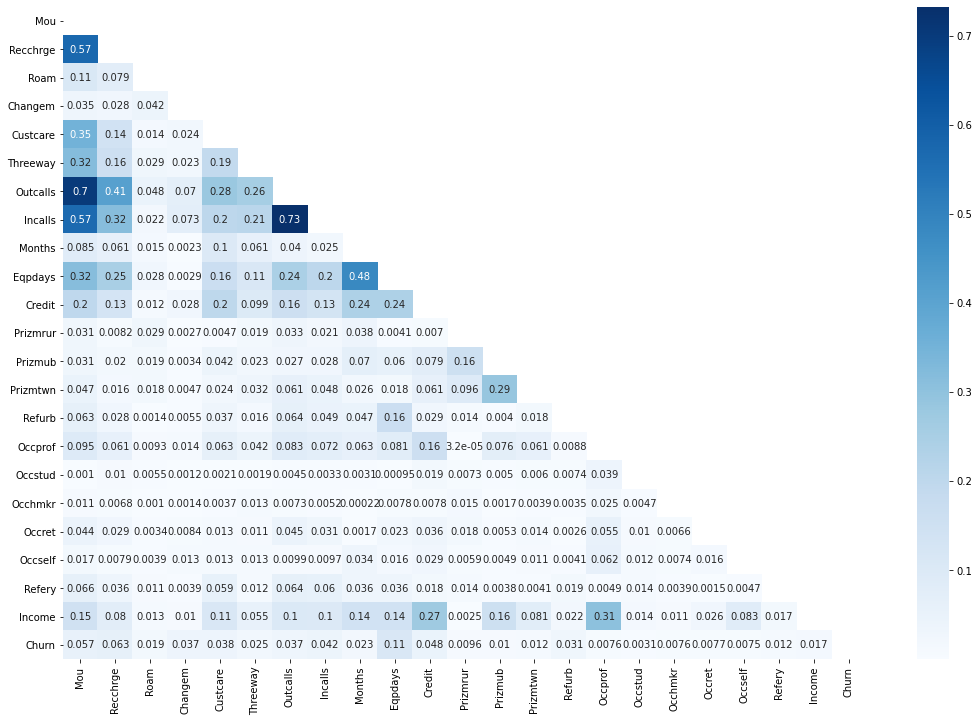

In [132]:
## Check correlations among features and target
abs_corr = model_data.corr().abs()
mask = np.zeros_like(abs_corr)
# Mask the correlations of the variables with themselves along the diagonal and all duplicate
 # correlations to the right of that line
mask[np.triu_indices_from(mask)] = True
mask
plt.figure(figsize=(18,12))
sns.heatmap(abs_corr, annot=True, cmap='Blues', mask=mask);

None of our features are highly correlated with our binary target, but there are some high correlations among the predictive features, shown in darker shades of blue. There may be some issues with multicollinearity for linear models. For the purpose of this example analysis, I'll try out a logistic regression and compare that model's performance with a tree-based algorithm that will likely be able to better handle interactions among the predictors.

## Model

In [133]:
## Import necessary functions/methods/classes for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

# ## Import classes necessary for building preprocessing pipelines
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
# from sklearn.compose import ColumnTransformer

### Split the Data into a Training and Testing Set

Using 80% of our remaining total 38,924 observations (customers) to train the model and save the other 20% to test how well the model does at predicting on new data.

In [134]:
## Define target variable
target = 'Churn'

## Separate features (X) and target (y) for train-test-split
X = model_data.drop(columns=[target], axis=1).copy()
y = model_data[target].copy()

## Define random seed to use for train-test-split and 
 ## classifiers for reproducibility
random_seed = 319

## Split the data into training and test sets prior to preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=random_seed)

### Logistic Regression

In [135]:
## Instantiate logistic regression classifier
logreg = LogisticRegression(random_state=random_seed,
                            n_jobs=-1)

## Fit log reg classifier to training data
logreg.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=319)

-------------------------------------------------------
Classification Report: 
-------------------------------------------------------
              precision    recall  f1-score   support

      Retain       0.57      0.55      0.56      4024
       Churn       0.55      0.57      0.56      3904

    accuracy                           0.56      7928
   macro avg       0.56      0.56      0.56      7928
weighted avg       0.56      0.56      0.56      7928

-------------------------------------------------------
-------------------------------------------------------




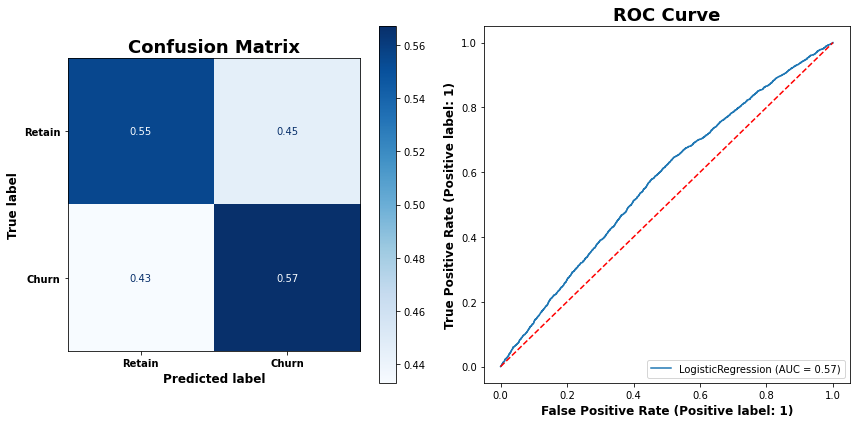

In [136]:
eval_clf(logreg, X_test, y_test);

### Random Forest Classifier

In [137]:
## Instantiate random forest classifier
rf = RandomForestClassifier(random_state=random_seed,
                            n_jobs=-1)

## Fit random forest classifier to training data
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=319)

-------------------------------------------------------
Classification Report: 
-------------------------------------------------------
              precision    recall  f1-score   support

      Retain       0.62      0.61      0.61      4024
       Churn       0.60      0.61      0.61      3904

    accuracy                           0.61      7928
   macro avg       0.61      0.61      0.61      7928
weighted avg       0.61      0.61      0.61      7928

-------------------------------------------------------
-------------------------------------------------------




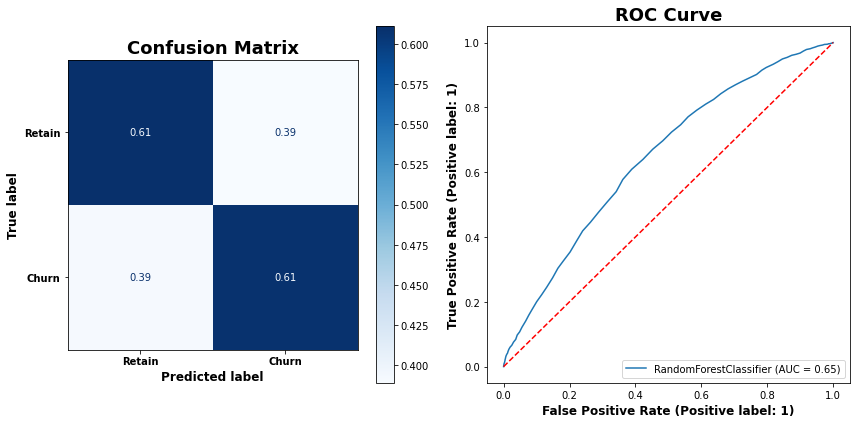

In [138]:
eval_clf(rf, X_test, y_test);